Importing All the Necessary Libraries

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

Loading Employee Salary Dataset

In [2]:
df = pd.read_csv("Employee_Salary_Dataset.csv")

In [3]:
## looking at top 5 rows of the dataset
df.head()

,ID,Experience_Years,Age,Gender,Salary
0,1,5,28,Female,250000
1,2,1,21,Male,50000
2,3,3,23,Female,170000
3,4,2,22,Male,25000
4,5,1,17,Male,10000


In [18]:
## Renaming ID to Employee_ID 
df.rename(columns={'ID':'Employee_ID'},inplace=True)
df.head()

,Employee_ID,Experience_Years,Age,Gender,Salary
0,1,5,28,Female,250000
1,2,1,21,Male,50000
2,3,3,23,Female,170000
3,4,2,22,Male,25000
4,5,1,17,Male,10000


In [5]:
df.shape

(35, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                35 non-null     int64 
 1   Experience_Years  35 non-null     int64 
 2   Age               35 non-null     int64 
 3   Gender            35 non-null     object
 4   Salary            35 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.5+ KB


In [8]:
df.describe(include=object)

,Gender
count,35
unique,2
top,Female
freq,18


In [9]:
## To Check If we Have Any Null Value in the Dataset
df.isnull().sum()

ID                  0
Experience_Years    0
Age                 0
Gender              0
Salary              0
dtype: int64

Conclusion: No null value present in the dataset

Loading Department Dataset

In [10]:
df1 = pd.read_csv("Department_Dataset.csv")

In [11]:
df1.head()

,ID,Dept_name,location,travel_required
0,1,HR,Pune,yes
1,2,Finance,Bangalore,no
2,3,Finance,Bangalore,no
3,4,Finance,Pune,no
4,5,Tech,Mumbai,no


In [19]:
## Renaming ID to Employee_ID 
df1.rename(columns={'ID':'Employee_ID'},inplace=True)
df1.head()

,Employee_ID,Dept_name,location,travel_required
0,1,HR,Pune,yes
1,2,Finance,Bangalore,no
2,3,Finance,Bangalore,no
3,4,Finance,Pune,no
4,5,Tech,Mumbai,no


In [15]:
df1.shape

(35, 4)

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               35 non-null     int64 
 1   Dept_name        35 non-null     object
 2   location         35 non-null     object
 3   travel_required  35 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.2+ KB


In [16]:
df1.isnull().sum()

ID                 0
Dept_name          0
location           0
travel_required    0
dtype: int64

No Null Value Present

Now, for our analysis we need Employee ID,Department,Gender,Years of Experience and Salary columns . But for this we need to merge the two datasets used above

In [20]:
df_m = pd.merge(df,df1,how='inner',on='Employee_ID')

In [21]:
df_m.head()

,Employee_ID,Experience_Years,Age,Gender,Salary,Dept_name,location,travel_required
0,1,5,28,Female,250000,HR,Pune,yes
1,2,1,21,Male,50000,Finance,Bangalore,no
2,3,3,23,Female,170000,Finance,Bangalore,no
3,4,2,22,Male,25000,Finance,Pune,no
4,5,1,17,Male,10000,Tech,Mumbai,no


In [23]:
## Extracting the columns that we need
df_fin = df_m[['Employee_ID','Dept_name','Gender','Experience_Years','Salary']]

In [24]:
df_fin.head()

,Employee_ID,Dept_name,Gender,Experience_Years,Salary
0,1,HR,Female,5,250000
1,2,Finance,Male,1,50000
2,3,Finance,Female,3,170000
3,4,Finance,Male,2,25000
4,5,Tech,Male,1,10000


 General Data Analysis and Visualization

In [28]:
## analyzing statistical parameters on the salary column
df_fin['Salary'].describe()

count    3.500000e+01
mean     2.059147e+06
std      3.170124e+06
min      3.000000e+03
25%      2.250000e+04
50%      2.500000e+05
75%      3.270000e+06
max      1.000000e+07
Name: Salary, dtype: float64

<AxesSubplot: xlabel='Experience_Years', ylabel='Dept_name'>

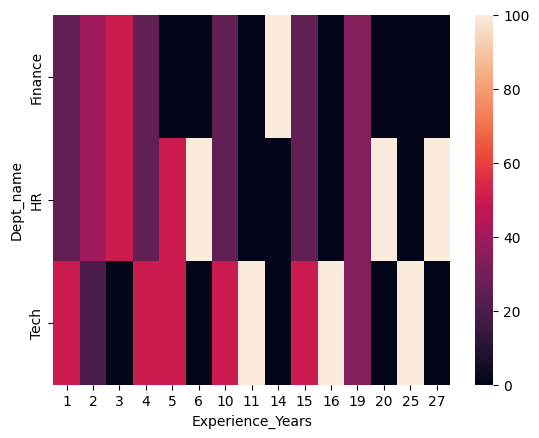

In [35]:
## finding frequency spread between department and years of experience
sns.heatmap(pd.crosstab(df_fin['Dept_name'],df_fin['Experience_Years'],normalize='columns')*100)


Gender  Dept_name
Female  HR            9
        Finance       5
        Tech          4
Male    Tech         10
        Finance       4
        HR            3
Name: Dept_name, dtype: int64

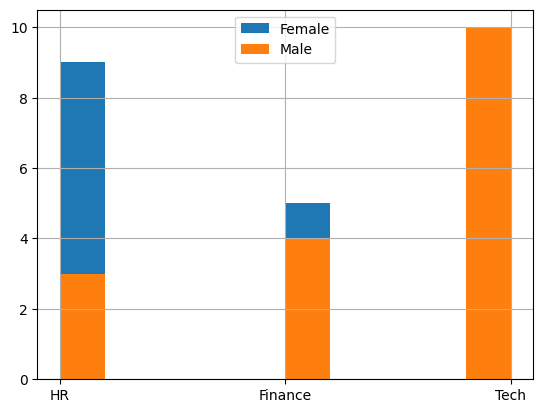

In [87]:
## analyzing/visualyzing male female ratio within the departments
a = df_fin.groupby(df_fin['Gender'])
a['Dept_name'].hist(legend='Gender')
a['Dept_name'].value_counts()


we can see that a large number of female employees work in the HR department whereas the TECH department is dominated by the male employees

In [42]:
## correlation between numerical datatypes (ID,YOE,Salary)
df_fin.corr()*100

,Employee_ID,Experience_Years,Salary
Employee_ID,100.000000,29.109757,36.209193
Experience_Years,29.109757,100.000000,68.559998
Salary,36.209193,68.559998,100.000000


In [ ]:
df_fin['Dept_name'].groupby(df_fin['Gender'])

Task Based Data Analysis and Visualization

Task 1:  Avg. salaries of employment by department

In [63]:
avg_sal=df_fin.groupby(df_fin['Dept_name'])
avg_sal['Salary'].mean()

Dept_name
Finance    2.165561e+06
HR         1.958208e+06
Tech       2.077257e+06
Name: Salary, dtype: float64

Task 2: which department has no. of employees

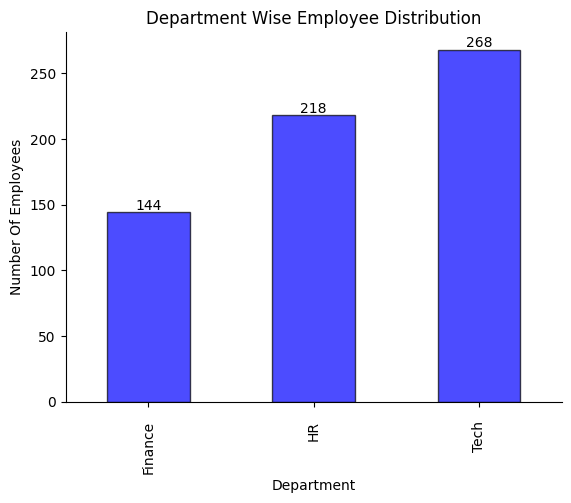

In [107]:
# Group the dataframe by department
dept_count = df_fin.groupby('Dept_name')

# Calculate the total number of employees in each department
emp_count = dept_count['Employee_ID'].sum()

ax = emp_count.plot(kind='bar', color='blue', edgecolor='black', linewidth=1, alpha=0.7)


ax.set_xlabel('Department')
ax.set_ylabel('Number Of Employees')

ax.set_title('Department Wise Employee Distribution')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add the value labels on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

ax.tick_params(axis='x', which='major', pad=10)

plt.show()

Conclusion: Tech has the Highest number of employees

Task 3: distribution of gender in the company

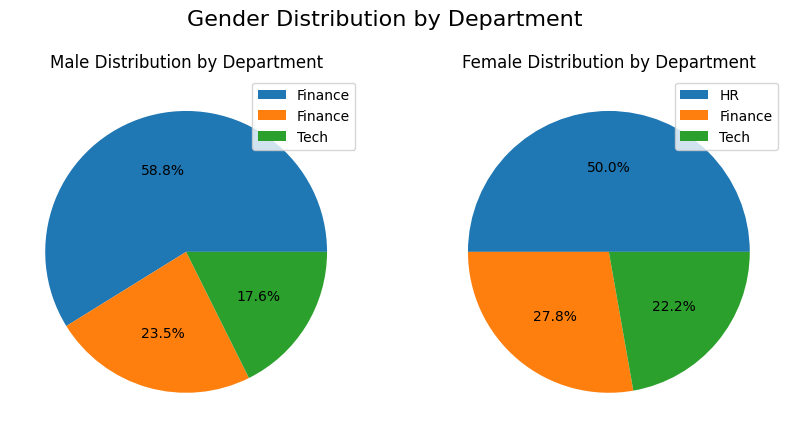

In [105]:
# Group the dataframe by gender
gen_dist = df_fin.groupby(df_fin['Gender'])

# Separate male and female dataframes
male_df = gen_dist.get_group('Male')
female_df = gen_dist.get_group('Female')

# Create subplots for male and female distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot male distribution
ax1.pie(male_df['Dept_name'].value_counts(), autopct='%1.1f%%')
ax1.set_title('Male Distribution by Department')
ax1.legend(male_df['Dept_name'], loc='best')

# Plot female distribution
ax2.pie(female_df['Dept_name'].value_counts(), autopct='%1.1f%%')
ax2.set_title('Female Distribution by Department')
ax2.legend(female_df['Dept_name'], loc='best')

plt.suptitle('Gender Distribution by Department', fontsize=16)

plt.show()


Task 4:
correlation between years of experience and salary

 correlation between years of experience and salary is:  68.55999775494617


<AxesSubplot: xlabel='Salary', ylabel='Experience_Years'>

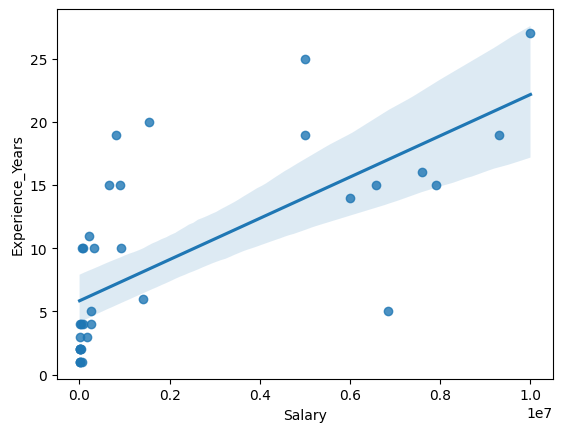

In [154]:
print(' correlation between years of experience and salary is: ',df_fin['Experience_Years'].corr(df_fin['Salary'])*100)
sns.regplot(data=df_fin,x='Salary',y='Experience_Years')


Task 5: which department has the highest avg. salary

The highest average salary of employees is in Finance which is 2165561.111111111


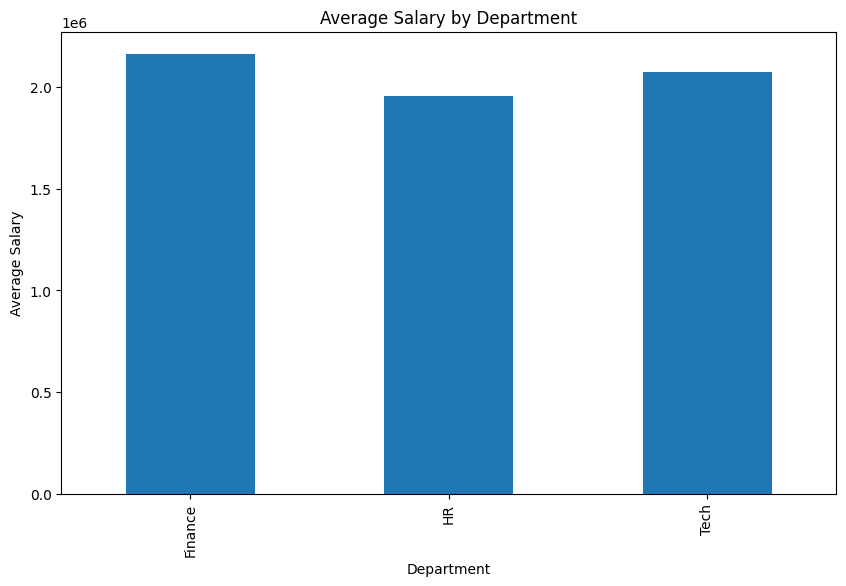

In [123]:
max_sal = df_fin.groupby(df_fin['Dept_name'])['Salary'].mean()
print(f'The highest average salary of employees is in {max_sal.idxmax()} which is {max_sal.max()}')
max_sal.plot(kind='bar', figsize=(10,6))
plt.title('Average Salary by Department')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.show()




Additional: Predicting salary based on age and years of experience using regression model

In [127]:
df_pred = df_m[['Employee_ID','Dept_name','Gender','Age','Experience_Years','Salary']]
df_pred.head()


,Employee_ID,Dept_name,Gender,Age,Experience_Years,Salary
0,1,HR,Female,28,5,250000
1,2,Finance,Male,21,1,50000
2,3,Finance,Female,23,3,170000
3,4,Finance,Male,22,2,25000
4,5,Tech,Male,17,1,10000


In [128]:
df_pred.isnull().sum()

Employee_ID         0
Dept_name           0
Gender              0
Age                 0
Experience_Years    0
Salary              0
dtype: int64

In [135]:
df_pred_copy = df_pred.copy()
df_pred_copy.drop(columns='Employee_ID',inplace=True)
df_pred_copy.drop(columns=['Dept_name','Gender'],inplace=True)
df_pred_copy.corr()

,Age,Experience_Years,Salary
Age,1.000000,0.973708,0.668444
Experience_Years,0.973708,1.000000,0.685600
Salary,0.668444,0.685600,1.000000


In [140]:
df_pred_copy.head()

,Age,Experience_Years,Salary
0,28,5,250000
1,21,1,50000
2,23,3,170000
3,22,2,25000
4,17,1,10000


In [145]:
X = df_pred_copy.drop(labels=['Salary'],axis=1)
Y = df_pred_copy[['Salary']]
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [147]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [148]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [149]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}
trained_model_list=[]
model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 2213479.744900225
MAE: 1671700.1256980046
R2 score 13.469154332068833


Lasso
Model Training Performance
RMSE: 2213473.96019001
MAE: 1671694.8525613002
R2 score 13.4696066110779


Ridge
Model Training Performance
RMSE: 1908268.3806770255
MAE: 1431262.794479709
R2 score 35.6870024151909


Elasticnet
Model Training Performance
RMSE: 1600165.8755467446
MAE: 1199069.4245199692
R2 score 54.77799091471507


